In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Directory where the CSV files are saved
csv_files_directory = './'  # Change this to the directory where the CSV files are saved

# Get a list of all CSV files that end with '_pop_data.csv'
csv_files = [file for file in os.listdir(csv_files_directory) if file.endswith('.csv')]

# Initialize a list to store DataFrames for each country
country_dataframes = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    country_df = pd.read_csv(csv_file)
    # print(os.path.splitext(csv_file)[0])
    # country_df = country_df.sort_values(by='Year', ascending=True)
    country_dataframes.append(country_df)


In [4]:
import os
import pandas as pd

def merge_csv_files(directory_path):
    # Initialize the merged DataFrame with None
    merged_df = None

    # Iterate through each file in the directory and read it into a DataFrame
    for filename in os.listdir(directory_path):
        if filename.endswith("_modified.csv"):
            file_path = os.path.join(directory_path, filename)
            print(file_path)
            df = pd.read_csv(file_path)

            # Perform the merge
            if merged_df is None:
                merged_df = df
            else:
                merged_df = pd.merge(merged_df, df, on='Year', how='inner')

    # Set the 'Year' column as the index
    if merged_df is not None:
        merged_df.set_index('Year', inplace=True)

        # Sort the DataFrame in ascending order based on the index 'Year'
        merged_df.sort_index(inplace=True)

    return merged_df

if __name__ == "__main__":
    # Provide the path to the directory containing the CSV files
    directory_path = "/Users/heliaa/University/Code"

    # Merge all the CSV files into a single DataFrame and sort it
    merged_df = merge_csv_files(directory_path)

    # Save the merged DataFrame to a new CSV file
    if merged_df is not None:
        merged_df.to_csv("merged_data.csv")
    else:
        print("No CSV files found for merging.")


/Users/heliaa/University/Code/samoa_gdp_data_modified.csv
/Users/heliaa/University/Code/maldives_pop_data_modified.csv
/Users/heliaa/University/Code/qatar_gdp_data_modified.csv
/Users/heliaa/University/Code/equatorial-guinea_gdp_data_modified.csv
/Users/heliaa/University/Code/liechtenstein_pop_data_modified.csv
/Users/heliaa/University/Code/thailand_pop_data_modified.csv
/Users/heliaa/University/Code/uganda_gdp_data_modified.csv
/Users/heliaa/University/Code/suriname_gdp_data_modified.csv
/Users/heliaa/University/Code/afghanistan_gdp_data_modified.csv
/Users/heliaa/University/Code/hong-kong_gdp_data_modified.csv
/Users/heliaa/University/Code/marshall-islands_pop_data_modified.csv
/Users/heliaa/University/Code/fiji_gdp_data_modified.csv
/Users/heliaa/University/Code/poland_pop_data_modified.csv
/Users/heliaa/University/Code/uruguay_pop_data_modified.csv
/Users/heliaa/University/Code/namibia_pop_data_modified.csv
/Users/heliaa/University/Code/new-zealand_pop_data_modified.csv
/Users/heli

In [5]:
df = pd.read_csv('merged_data.csv',index_col='Year')

In [6]:
correlation_matrix = df.corr()
correlation_matrix

,samoa_x,maldives_x,qatar_x,equatorial-guinea,liechtenstein,thailand_x,uganda,suriname_x,afghanistan,hong-kong_x,...,bosnia,bahrain,guatemala_y,barbados,french-polynesia_y,iceland,ireland_y,iran_y,liberia,moldova
samoa_x,1.000000,0.773184,-0.453107,-0.746762,0.691812,0.777625,0.312214,-0.586243,-0.247645,0.829293,...,0.338448,0.690216,0.716689,0.820600,0.677704,0.824788,0.702224,0.777858,0.241611,0.481575
maldives_x,0.773184,1.000000,-0.478009,-0.808735,0.991378,0.996741,0.785803,-0.841206,-0.622008,0.957309,...,0.722928,0.788175,0.996025,0.487596,0.988504,0.857248,0.989812,0.997032,0.304786,0.791352
qatar_x,-0.453107,-0.478009,1.000000,0.850150,-0.430930,-0.509824,-0.125831,0.653586,0.119349,-0.384025,...,0.191866,0.111768,-0.455143,-0.003781,-0.426812,-0.246166,-0.413694,-0.519423,0.095064,0.094637
equatorial-guinea,-0.746762,-0.808735,0.850150,1.000000,-0.758391,-0.836097,-0.418938,0.787377,0.466417,-0.794853,...,-0.206161,-0.379412,-0.782010,-0.420361,-0.750798,-0.669880,-0.741139,-0.843723,-0.267107,-0.291782
liechtenstein,0.691812,0.991378,-0.430930,-0.758391,1.000000,0.983595,0.851165,-0.832678,-0.655722,0.928936,...,0.779706,0.784740,0.998794,0.409314,0.999715,0.815169,0.998089,0.983880,0.289859,0.832585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iceland,0.824788,0.857248,-0.246166,-0.669880,0.815169,0.867845,0.501848,-0.708095,-0.674421,0.950705,...,0.654069,0.882896,0.833548,0.734097,0.805454,1.000000,0.810699,0.863984,0.634247,0.689791
ireland_y,0.702224,0.989812,-0.413694,-0.741139,0.998089,0.977700,0.847652,-0.825697,-0.633245,0.922822,...,0.792056,0.796774,0.996043,0.418431,0.998200,0.810699,1.000000,0.978417,0.262518,0.851894
iran_y,0.777858,0.997032,-0.519423,-0.843723,0.983880,0.999577,0.760788,-0.852202,-0.635994,0.963327,...,0.682626,0.762695,0.991213,0.491151,0.980084,0.863984,0.978417,1.000000,0.335652,0.747608
liberia,0.241611,0.304786,0.095064,-0.267107,0.289859,0.334518,0.087691,-0.313152,-0.820783,0.504018,...,0.348849,0.513755,0.305811,0.514982,0.283051,0.634247,0.262518,0.335652,1.000000,0.229385


In [7]:
# Calculate the correlation matrix for the entire dataset
global_correlation_matrix = df.corr()

In [8]:
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
top_5_corr_columns = correlation_pairs[correlation_pairs != 1.0][:5]

print("Top 5 correlated column pairs:")
print(top_5_corr_columns)

Top 5 correlated column pairs:
kazakhstan_x   turkmenistan     0.999988
turkmenistan   kazakhstan_x     0.999988
malaysia_x     netherlands_y    0.999987
netherlands_y  malaysia_x       0.999987
sweden_x       paraguay_y       0.999984
dtype: float64


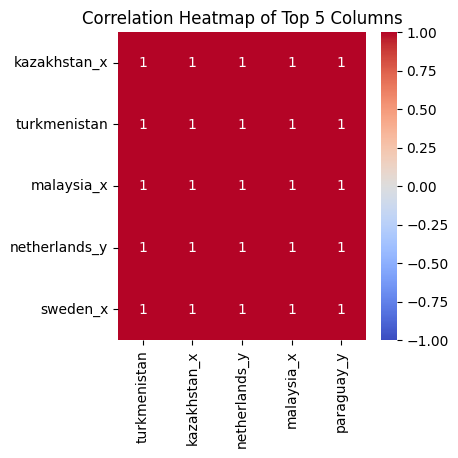

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We use 'reset_index' to convert the multi-index Series back to a DataFrame.
top_5_corr_matrix = global_correlation_matrix.loc[top_5_corr_columns.index.get_level_values(0),
                                                 top_5_corr_columns.index.get_level_values(1)]


# Step 6: Plot the correlation heatmap using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(top_5_corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Top 5 Columns')
plt.show()


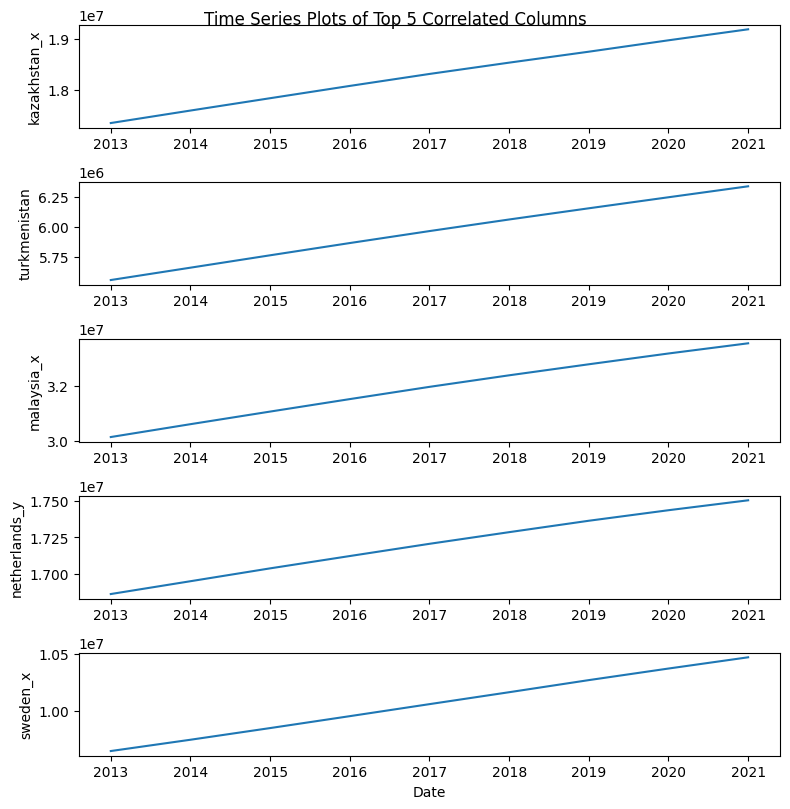

In [10]:
# Step 5: Get the names of the top 5 correlated columns
top_5_corr_column_names = top_5_corr_columns.index.get_level_values(0).unique()


plt.figure(figsize=(8, 8))
for i, column in enumerate(top_5_corr_column_names, 1):
    plt.subplot(5, 1, i)
    plt.plot(df.index, df[column])
    plt.ylabel(column)
    plt.tight_layout()

plt.xlabel('Date')
plt.suptitle('Time Series Plots of Top 5 Correlated Columns')
plt.show()

In [14]:
# Filter the original DataFrame to include only data from the top 5 correlated countries
top_5_corr_data = df[top_5_corr_column_names]


# Save the filtered data to a new CSV file
top_5_corr_data.to_csv('top_5_correlated_countries_with_year.csv')

data = pd.read_csv('top_5_correlated_countries_with_year.csv')

X = data.drop(columns=['Year','sweden_x'])
y  = data['sweden_x']


year = data['Year'].astype(str)
data['Year'] = pd.to_datetime(year)
    # Set 'date' column as the index
data.set_index('Year', inplace=True)


data['Prediction']=data[['sweden_x']].shift(-6)

In [15]:
data

,kazakhstan_x,turkmenistan,malaysia_x,netherlands_y,sweden_x,Prediction
Year,,,,,,
2013-01-01,17345732,5560095,30134807,16867352,9648932,10267922.0
2014-01-01,17592298,5663152,30606459,16954081,9747508,10368969.0
2015-01-01,17835909,5766431,31068833,17041107,9849349,10467097.0
2016-01-01,18078553,5868561,31526418,17124505,9953317,NaN
2017-01-01,18314814,5968383,31975806,17207198,10058190,NaN
2018-01-01,18538099,6065066,32399271,17286042,10162298,NaN
2019-01-01,18754258,6158420,32804020,17363262,10267922,NaN
2020-01-01,18979243,6250438,33199993,17434557,10368969,NaN
2021-01-01,19196465,6341855,33573874,17501696,10467097,NaN


In [16]:
X = np.array(data.drop(['Prediction'],1))
X=X[:-6]
y = np.array(data['Prediction'])
y=y[:-6]

/var/folders/g1/dmkdm0ld5hg10nkqjgj2k4tw0000gn/T/ipykernel_38131/1344136456.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Prediction'],1))


In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create and fit the LinearRegression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (slopes) and the intercept
coefficients = model.coef_
intercept = model.intercept_

In [18]:
# Assuming you have already imported the necessary libraries, including numpy and the model.
forecast=np.array(data.drop(['Prediction'],1))[-6:]

pred=model.predict(forecast)

# Round the prediction values to integers (without decimal places)
pred = pred.astype(int)

# Creating a DataFrame for the forecast values with corresponding dates
forecast_dates = pd.date_range(start=data.index[-1], periods=len(pred)+1, freq='A')[-len(pred):]
forecast_df = pd.DataFrame({'thailand': pred}, index=forecast_dates)

# Merging the original DataFrame and the forecast DataFrame
merged_df = pd.concat([data, forecast_df])

merged_df.to_csv(f'final_modified1.csv')

/var/folders/g1/dmkdm0ld5hg10nkqjgj2k4tw0000gn/T/ipykernel_38131/127133870.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  forecast=np.array(data.drop(['Prediction'],1))[-6:]


In [19]:
# Calculate the absolute average correlation for each column
average_correlations = correlation_matrix.abs().mean()

# Get the top 5 columns with the highest average correlation
next_5_corr_columns = average_correlations.nlargest(5)

print("Next 5 correlated columns:")
print(next_5_corr_columns)

Next 5 correlated columns:
malta              0.741802
kenya              0.738002
united-states_x    0.735896
nepal              0.734879
rwanda             0.734789
dtype: float64


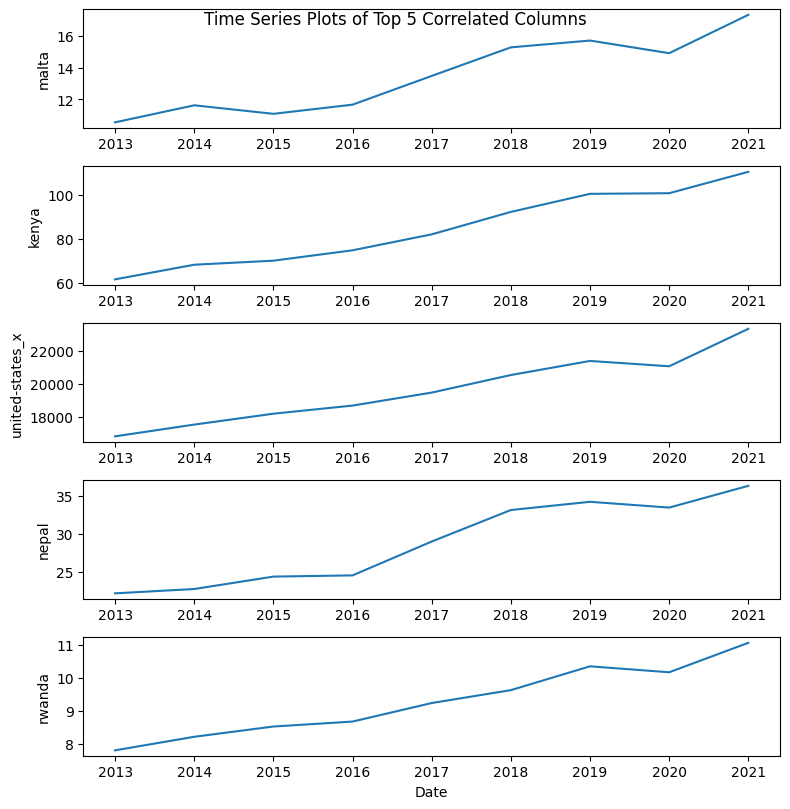

In [20]:
# Step 5: Get the names of the top 5 correlated columns
top_5_corr_column_names = next_5_corr_columns.index.get_level_values(0).unique()


plt.figure(figsize=(8, 8))
for i, column in enumerate(top_5_corr_column_names, 1):
    plt.subplot(5, 1, i)
    plt.plot(df.index, df[column])
    plt.ylabel(column)
    plt.tight_layout()

plt.xlabel('Date')
plt.suptitle('Time Series Plots of Top 5 Correlated Columns')
plt.show()

In [22]:
# Filter the original DataFrame to include only data from the top 5 correlated countries
top_5_corr_data = df[top_5_corr_column_names]


# Save the filtered data to a new CSV file
top_5_corr_data.to_csv('top_5_correlated_countries_with_year.csv')

data = pd.read_csv('top_5_correlated_countries_with_year.csv')

X = data.drop(columns=['Year','nepal'])
y  = data['nepal']


year = data['Year'].astype(str)
data['Year'] = pd.to_datetime(year)
    # Set 'date' column as the index
data.set_index('Year', inplace=True)


data['Prediction']=data[['nepal']].shift(-6)

In [26]:
X = np.array(data.drop(['Prediction'],1))
X=X[:-6]
y = np.array(data['Prediction'])
y=y[:-6]


# Initialize a list to store the MAE and MSE for each country
mae_results_rf = []
mse_results_rf = []
mae_results_lr = []
mse_results_lr = []


# Step 3: Initialize the StandardScaler
scaler = MinMaxScaler()

# Step 4: Standardize each row in the DataFrame
# standardized_data = []
# for _, row in X.iterrows():
#     scaled_row = scaler.fit_transform(row.values.reshape(1, -1))
#     standardized_data.append(scaled_row)


# Create and fit the LinearRegression model
model = LinearRegression()
model.fit(X, y)


# Assuming you have already imported the necessary libraries, including numpy and the model.
forecast=np.array(data.drop(['Prediction'],1))[-6:]

pred=model.predict(forecast)

# Round the prediction values to integers (without decimal places)
pred = pred.astype(int)

# Creating a DataFrame for the forecast values with corresponding dates
forecast_dates = pd.date_range(start=data.index[-1], periods=len(pred)+1, freq='A')[-len(pred):]
forecast_df = pd.DataFrame({'': pred}, index=forecast_dates)

# Merging the original DataFrame and the forecast DataFrame
merged_df = pd.concat([data, forecast_df])

merged_df.to_csv(f'final_modified2.csv')

/var/folders/g1/dmkdm0ld5hg10nkqjgj2k4tw0000gn/T/ipykernel_38131/4220643088.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Prediction'],1))
/var/folders/g1/dmkdm0ld5hg10nkqjgj2k4tw0000gn/T/ipykernel_38131/4220643088.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  forecast=np.array(data.drop(['Prediction'],1))[-6:]
